# Bicilcetas compartidas

Objetivos:

    - ¿En qué epoca del año debo asegurarme tener el mayor número de bicicletas?
    - ¿cuáles  son las horas del día y los dias de la semana donde voy a tener mayor demanda ?
    - Es posible inferir el uso qué le dan a las bicicletas mis usuarios ?
    - Cómo afectan las condiciones climáticas en la renta de las bicicletas ?

# Importación de librerías

En las siguientes líneas se importarán las librerías necesarias, las cuales son **Pandas** para el manejo de datos, **matplotlib** para realizar gráficas.

In [1]:
#Para manejo de datos
import pandas as pd
# Para gráficar
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos

In [2]:
# Carga datos dia
data_d= pd.read_csv('Bike-Sharing-Dataset/day.csv',index_col=0)

In [3]:
# Muestra de datos dia
data_d.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Descripción de los datos

In [4]:
# dimensión de la fuente de datos
data_d.shape

(731, 15)

In [5]:
# identificar los tipos de datos
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


De lo anterior vemos que no se tienen datos faltantes

# Preparación y limpieza de datos

In [6]:
# contar los registros duplicados del atributo orden_id
data_d.duplicated().sum()

0

In [7]:
#Creación de otro archivo para la limpieza
data_t= data_d
#Eliminación data vacia
data_t= data_t.dropna()
#Eliminación data duplicada
data_t= data_t.drop_duplicates()


# Análisis de los atributos

In [8]:
#identificar los tipos de datos
data_t.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
# Transformar dteday en una fecha
data_t['dteday'] = pd.to_datetime(data_t['dteday'], format="%Y/%m/%d")
# Transformar yr en una categoria: : año (0: 2011, 1:2012)
data_t['yr'] = data_t['yr'].astype('category')
# Transformar season en una categoria:  season (1:invierno, 2:primavera, 3:verano, 4 :fall)
data_t['season'] = data_t['season'].astype('category')
# Transformar holiday en una categoria
data_t['holiday'] = data_t['holiday'].astype('category')
# Transformar weekday en una categoria: día de la semana
data_t['weekday'] = data_t['weekday'].astype('category')
# Transformar workingday en una categoria: si el día no es fin de semana ni festivo es 1, de lo contrario es 0.
data_t['workingday'] = data_t['workingday'].astype('category')
# Transformar mnth en una categoria: mes del año
data_t['mnth'] = data_t['mnth'].astype('category')
#: weathersit :- 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado- 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla- 3: Nieve ligera, Lluvia ligera + Tormenta eléctrica + Nubes dispersas, Lluvia ligera + Nubes dispersas -4: Lluvia intensa + Paletas de hielo + Tormenta eléctrica + Niebla, Nieve + Niebla
data_t['weathersit'] = data_t['weathersit'].astype('category')






In [10]:
#identificar los tipos de datos
data_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 57.8

### Estadísticas sobre datos númericos

In [11]:
# Estadísticas básicas para las variables numéricas
data_t.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Estadísticas sobre datos categóricos

In [12]:
#identificar las columnas de tipo string, si no se toma de la descripción inicial de la fuente de datos
columnas_cat= data_t.select_dtypes(include=['category','datetime']).columns

columnas_cat

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [13]:
# contar los valores de cada atributo categórico
for i in ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']:
    print('Atributo: '+ i)
    print(data_t[i].value_counts())

Atributo: dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: dteday, Length: 731, dtype: int64
Atributo: season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
Atributo: yr
1    366
0    365
Name: yr, dtype: int64
Atributo: mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64
Atributo: holiday
0    710
1     21
Name: holiday, dtype: int64
Atributo: weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64
Atributo: workingday
1    500
0    231
Name: workingday, dtype: int64
Atributo: weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64


# Visualización de datos
Vanis a revisar el total de bicicletas por día durante el último año

In [14]:
#agrupar por fechas
#fechas de límites
fecha_inicio =  data_t.dteday.min()
fecha_final = data_t.dteday.max()
#calcular entre dos fechas
despues_fecha_inicio = data_t['dteday'] >= fecha_inicio
antes_fecha_final = data_t['dteday'] <= fecha_final
entre_dos_fechas = despues_fecha_inicio & antes_fecha_final

#crear los datos para graficar
fecha_ventas=data_t

# obtener solamente los días
fecha_ventas['dteday']=fecha_ventas['dteday']
fecha_ventas=fecha_ventas[entre_dos_fechas].groupby('dteday')['cnt'].sum().reset_index()
fecha_ventas.head()


,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


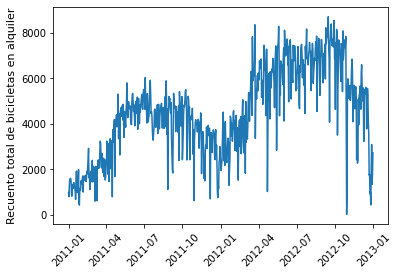

In [15]:
plt.plot(fecha_ventas['dteday'],fecha_ventas['cnt'])
plt.xticks(rotation = 45)
plt.ylabel("Recuento total de bicicletas en alquiler", size=11)
plt.show()

In [16]:
# resumir la información
alquiler_mes=data_t.groupby('season').mean()['cnt'].reset_index()
alquiler_mes

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


C:\Users\ortiz\AppData\Local\Temp/ipykernel_19616/1258272656.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[" "," ","Invierno"," ","Primavera"," ","Verano"," ","Otoño"])


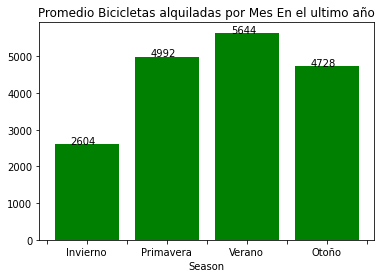

In [17]:

fig, ax= plt.subplots()
#Diagrama para un subconjunto de meses
ax.bar(alquiler_mes.index,alquiler_mes['cnt'],color="g")

#Altura barras

for i,j in zip(alquiler_mes.index,alquiler_mes['cnt']):
    ax.annotate(int(j),xy=(i-0.2,j+1))

#Personalización Gráfico
ax.set_title('Promedio Bicicletas alquiladas por Mes En el ultimo año')
ax.set_xlabel('Season')

ax.set_xticklabels(labels=[" "," ","Invierno"," ","Primavera"," ","Verano"," ","Otoño"])


plt.show();

Días de la semana con mayor número demanda por tipo de usuario

In [18]:
# resumir la información
semanal_casual=data_t.groupby('weekday').mean()['casual'].reset_index()
semanal_casual



,weekday,casual
0,0,1338.295238
1,1,674.133333
2,2,556.182692
3,3,551.144231
4,4,590.961538
5,5,752.288462
6,6,1465.257143


In [19]:
# resumir la información
semanal_registrado=data_t.groupby('weekday').mean()['registered'].reset_index()
semanal_registrado

,weekday,registered
0,0,2890.533333
1,1,3663.990476
2,2,3954.480769
3,3,3997.394231
4,4,4076.298077
5,5,3938.000000
6,6,3085.285714


C:\Users\ortiz\AppData\Local\Temp/ipykernel_19616/220469511.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=["","Domingo", "Lunes","Martes","Miercoles","Jueves","Viernes","Sábado"])
C:\Users\ortiz\AppData\Local\Temp/ipykernel_19616/220469511.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=["","Domingo", "Lunes","Martes","Miercoles","Jueves","Viernes","Sábado"])


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'Domingo'),
 Text(1.0, 0, 'Lunes'),
 Text(2.0, 0, 'Martes'),
 Text(3.0, 0, 'Miercoles'),
 Text(4.0, 0, 'Jueves'),
 Text(5.0, 0, 'Viernes'),
 Text(6.0, 0, 'Sábado'),
 Text(7.0, 0, '')]

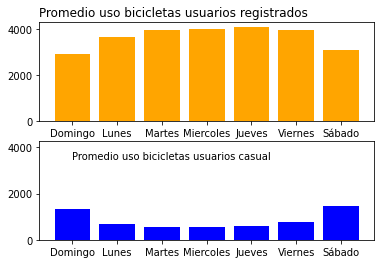

In [20]:
fig, ax = plt.subplots(2, 1, sharey=True)
ax[0].bar(semanal_registrado.index,semanal_registrado['registered'], color="orange")
ax[0].set_title('Promedio uso bicicletas usuarios registrados',loc='left')
ax[1].bar(semanal_casual.index,semanal_casual['casual'], color="blue")
ax[1].annotate("Promedio uso bicicletas usuarios casual",xy=(0,3500))

ax[0].set_xticklabels(labels=["","Domingo", "Lunes","Martes","Miercoles","Jueves","Viernes","Sábado"])
ax[1].set_xticklabels(labels=["","Domingo", "Lunes","Martes","Miercoles","Jueves","Viernes","Sábado"])